## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 6: Fourier Analysis
## Due November 19, 2023 by 11:59 PM
### <span style="color: red">David Petkov</span>

Copyright &copy; 2023, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate.
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order.


In [2]:
import math
import imageio
import cmath # For problem 1
import scipy # Has linear algebra
import scipy.ndimage
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from matplotlib.ticker import MaxNLocator # to make integer ticks on x axis

### 1. Exponential form of Complex Numbers

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

## Answers to Problem 1

$$
re^{i \theta} \\
\theta = \arctan(y,x) \\
r = \sqrt{real^2+imag^2}$$

\\
a) For $0$ , $real=imag=0$ :

$$
\theta = \tan \frac{0}{0} =0 \\
r = \sqrt{0^2+0^2}=0 \\
0e^{i0} =0
$$

b) For $1$ , $r=1$ , $i=0$ :

$$
\theta = \tan \frac{0}{1} =0 \\
r = \sqrt{1^2+0^2}=1 \\
1e^{i0} =1
$$

c) For $-1$ , $r=-1$ , $i=0$ :

$$
\theta = \pi \\
r = \sqrt{-1^2+0^2}=1 \\
1e^{i \pi}
$$

d) For $i$ , $r=0$ , $i=1$ :

$$
\theta = \frac{\pi}{2} \\
r = \sqrt{0^2+1^2}=1 \\
1e^{i \frac{\pi}{2}}
$$

e) For $1-2i$ , $r=1$ , $i=-2$ :

$$
\theta =-1.107 \\
r = \sqrt{1^2-2^2}= \sqrt{5} \\
\sqrt{5}e^{-1.107i}
$$

f) For $-8+7i$ , $r=-8$ , $i=7$ :

$$
\theta =2.422 \\
r = \sqrt{-8^2+7^2}= \sqrt{113} \\
\sqrt{113}e^{2.422i}
$$

In [ ]:
# 1A
print("Magnitude:",abs(0)) # Find magnitude
print("Angle:",np.angle(0+0j)) # Find angle

Magnitude: 0
Angle: 0.0


In [ ]:
# 1B
print("Magnitude:",abs(1))
print("Angle:",np.angle(1+0j))
sm.atan2(0,1)

Magnitude: 1
Angle: 0.0


0

In [ ]:
# 1C
print("Magnitude:",abs(-1))
print("Angle:",np.angle(-1+0j))
sm.atan2(0,-1)

Magnitude: 1
Angle: 3.141592653589793


π

In [ ]:
# 1D
print("Magnitude:",abs(sm.I))
print("Angle:",np.angle(1j))
sm.atan2(1,0)

Magnitude: 1
Angle: 1.5707963267948966


π
─
2

In [ ]:
# 1E
print("Magnitude:",abs(1-2*sm.I))
print("Angle:",np.angle(1-2j))
sm.atan2(2,1)

Magnitude: sqrt(5)
Angle: -1.1071487177940904


atan(2)

In [ ]:
# 1F
print("Magnitude:",abs(-8+7*sm.I))
print("Angle:",np.angle(-8+7j))
sm.atan2(7,-8)

Magnitude: sqrt(113)
Angle: 2.4227626539681686


π - atan(7/8)

### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

## Answers to Problem 2

$$
e^{i \theta} = \cos \theta + i \sin \theta
$$

a) $e^{(\alpha + \beta)i} = \cos (\alpha + \beta) + i \sin (\alpha + \beta)$

\\
b)
$$
e^{(\alpha + \beta)i} = e^{(\alpha)i} \times e^{(\beta)i} \\
= (\cos (\alpha) + i \sin (\alpha ))(\cos (\beta) + i \sin (\beta)) \\
Real =\cos(a)\cos(b)-\sin(a)\sin(b) \\
Imag= i(\cos(a)\sin(b)+\sin(a)\cos(b))
$$

\\
c) Parts 2a and 2b are identical in real and imaginary part.

$$
Real =\cos(a)\cos(b)-\sin(a)\sin(b) = \cos(\alpha + \beta) \\
Imag= i(\cos(a)\sin(b)+\sin(a)\cos(b)) = i\sin(\alpha + \beta) \\
Real+Imag = \cos(\alpha + \beta) +i\sin(\alpha + \beta)
$$

### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

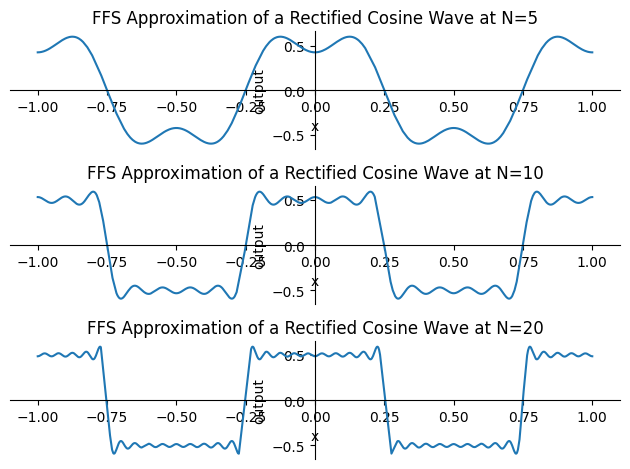

In [3]:
# Code for Problem 3
from sympy.plotting import plot, PlotGrid

# Declare symbols and equations
t = sm.symbols("t", real=True)
n = sm.symbols("n", integer=True, positive=True)
q = 2*sm.pi*sm.I*n*t
T = sm.Rational(1,4)
y=abs(sm.cos(2*sm.pi))


# Integrate function
A = sm.integrate(y*sm.exp(q),(t,-T,0))
B = sm.integrate(abs(y)*sm.exp(q),(t,0,T))
fn=A+B
#fn, fn.simplify()

# Define N
vals5 = range(-4,5)
vals10 = range(-10,10)
vals20 = range(-20,20)

# Calculate the terms of the Fourier series
terms5 = [sm.Integer(0) if k == 0 else fn.subs(n,k)*sm.exp(-2*sm.pi*sm.I*k*t) for k in vals5]
terms10 = [sm.Integer(0) if k == 0 else fn.subs(n,k)*sm.exp(-2*sm.pi*sm.I*k*t) for k in vals10]
terms20 = [sm.Integer(0) if k == 0 else fn.subs(n,k)*sm.exp(-2*sm.pi*sm.I*k*t) for k in vals20]

# Plot the sums of the series
fapprox5 = sum(terms5)
fapprox10 = sum(terms10)
fapprox20 = sum(terms20)

plt5=sm.plot(fapprox5,(t,-1,1),title="FFS Approximation of a Rectified Cosine Wave at N=5",xlabel="x",ylabel="output",show=False);
plt10=sm.plot(fapprox10,(t,-1,1),title="FFS Approximation of a Rectified Cosine Wave at N=10",xlabel="x",ylabel="output",show=False);
plt20=sm.plot(fapprox20,(t,-1,1),title="FFS Approximation of a Rectified Cosine Wave at N=20",xlabel="x",ylabel="output",show=False);

PlotGrid(3, 1, plt5, plt10,plt20)

### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

## Answer to Problem 4

$$
\cos \theta = \frac{e^{i\theta} + e^{-i \theta}}{2} \\
\sin \theta = \frac{e^{i\theta} - e^{-i \theta}}{2i} \\
\theta = 2 \pi t
$$

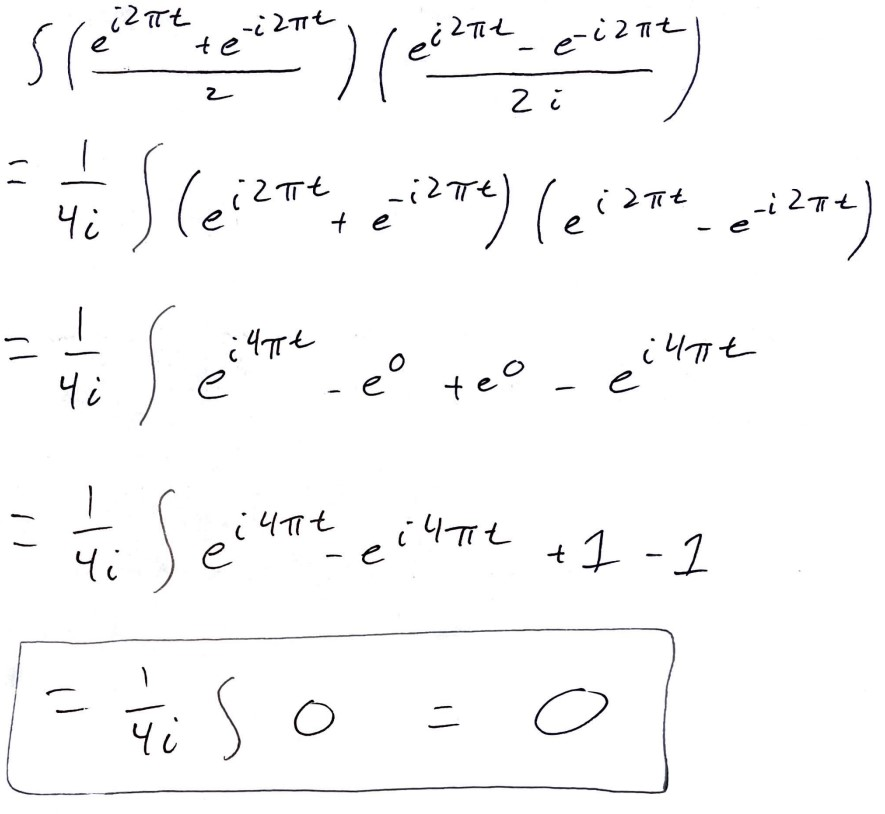

### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`.
Make sure to simplify, these shouldn't give complicated results.

Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

In [57]:
# Code for Problem 5

# Display Fourier Transforms
import sympy as sm
from sympy import symbols, oo, fourier_transform, pi

t, s = sm.var("t s")

# Find FTs
Ff1a = sm.integrate(sm.exp(-2*sm.pi*sm.I*s*t)*1,(t,0, sm.oo))
Ff1b = sm.fourier_transform(0, t, s)
Ff2 = sm.fourier_transform(1/(1+ t**2), t, s)
Ff3 = sm.fourier_transform(sm.exp(-pi*(t**2)), t, s)
Ff1a # FT of Function 1 for 1

⎧      -ⅈ              │         π│   π
⎪     ─────        for │arg(s) + ─│ < ─
⎪     2⋅π⋅s            │         2│   2
⎪                                      
⎪∞                                     
⎨⌠                                     
⎪⎮  -2⋅ⅈ⋅π⋅s⋅t                         
⎪⎮ ℯ           dt       otherwise      
⎪⌡                                     
⎪0                                     
⎩                                      

In [ ]:
Ff1b # FT of Function 1 for 0

0

In [ ]:
Ff2 # FT of Function 2

   -2⋅π⋅s
π⋅ℯ      

In [ ]:
Ff3 # FT of Function 3

     2
 -π⋅s 
ℯ     

<function matplotlib.pyplot.show(close=None, block=None)>

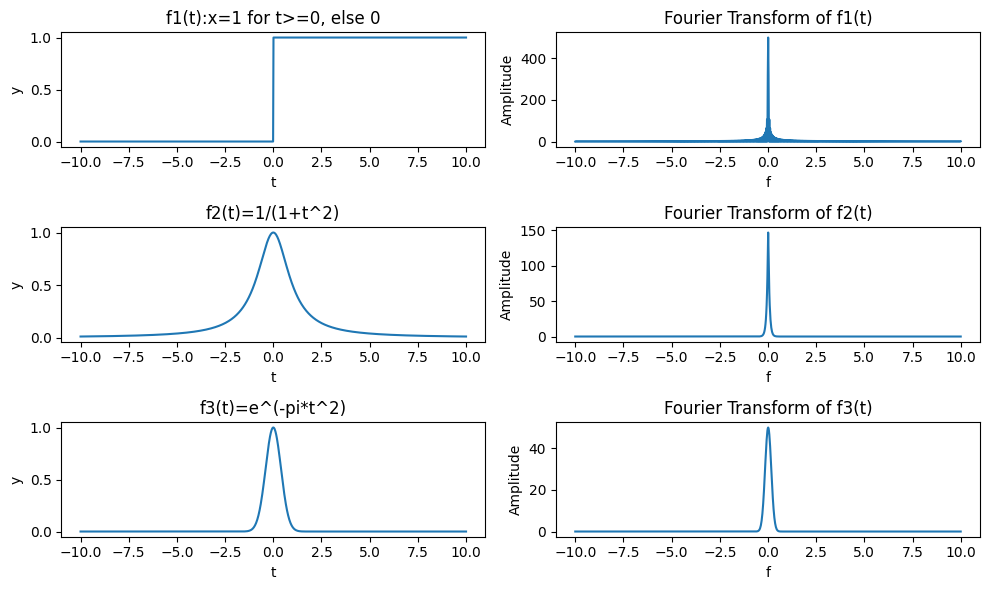

In [49]:
# Define each function
def f1(t):
    return np.piecewise(t, [t >= 0, t < 0], [1, 0])

def f2(t):
    return 1/(1+(t**2))

def f3(t):
    return np.exp(-np.pi*(t**2))

t = np.linspace(-10, 10, 1000) # Define domain

# Calculate Fourier Transforms
FT1 = np.fft.fftshift(np.fft.fft(f1(t)))
FT2 = np.fft.fftshift(np.fft.fft(f2(t)))
FT3 = np.fft.fftshift(np.fft.fft(f3(t)))

# Plot Chracteristics
fig,ax = plt.subplots(3,2, figsize=(10,6),tight_layout=True)
ax[0,0].plot(t,f1(t)); ax[0,0].set_title("f1(t):x=1 for t>=0, else 0");ax[0,0].set_xlabel("t");ax[0,0].set_ylabel("y");
ax[0,1].plot(t,abs(FT1)); ax[0,1].set_title("Fourier Transform of f1(t)");ax[0,1].set_xlabel("f");ax[0,1].set_ylabel("Amplitude");
ax[1,0].plot(t,f2(t)); ax[1,0].set_title("f2(t)=1/(1+t^2)");ax[1,0].set_xlabel("t");ax[1,0].set_ylabel("y");
ax[1,1].plot(t,abs(FT2)); ax[1,1].set_title("Fourier Transform of f2(t)");ax[1,1].set_xlabel("f");ax[1,1].set_ylabel("Amplitude");
ax[2,0].plot(t,f3(t)); ax[2,0].set_title("f3(t)=e^(-pi*t^2)");ax[2,0].set_xlabel("t");ax[2,0].set_ylabel("y");
ax[2,1].plot(t,abs(FT3)); ax[2,1].set_title("Fourier Transform of f3(t)");ax[2,1].set_xlabel("f");ax[2,1].set_ylabel("Amplitude");
plt.show

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{eqnarray}
\dot x & = & -y \\
\dot y & = & -x + u
\end{eqnarray}

a) First take the Fourier Transform of both equations.

b) Solve for $Y(s)$ in terms of $U(s)$.

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function.

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$.

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$.

## Answers to Problem 6

$s=2 \pi is$

a)
$$
sX(s)=-Y(s) \\
sY(s) = -X(s)+U(s)
$$

b)
$$
sY(s) = -\frac{Y(s)}{ s}+U(s)s \\
Y(s)(s^2-1)=sU(s) \\
Y(s)= \frac{sU(s)}{s^2-1}
$$

c) Function of time, call it $F(s)$
$$
F(s) = \frac{s}{s^2-1} \\
=\frac{s}{(s+1)(s-1)} \\
=0.5(\frac{1}{s+1}+\frac{1}{s-1}) \\
f(t)=\frac{e^t}{2}+\frac{e^{-t}}{2}
$$

d)
$$
Y(S)=F(s) \times U(s) \\
y(t)=f(t)*u(t) \\
y(t) =(\frac{e^t}{2}+\frac{e^{-t}}{2})*u(t)
$$

e)
$$
sX(s)=-Y(s) \\
X(s)=\frac{-Y(s)}{s} \\
From \ b: \ Y(s)= \frac{sU(s)}{s^2-1} \\
X(s)=-F(s) \times Y(s) \\
F(s) = \frac{1}{s} \\
f(t) = 1 \\
x(t)=-f(t)*y(t) \\
x(t)=-y(t)
$$

### 7.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`.

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it.

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

## Answer to Problem 7

The information in the magnitude in problem $b$ is that most values are around 255, hence why it is almost all white, except in the middle of the transformed picture. You are seeing the background features of the picture.

The information in the magnitude in problem $c$ is that most angle values are around 0, hence why it is almost all black.

The information in the magnitude in problem $d$ is that all magnitude values are 1, hence why it is all black.

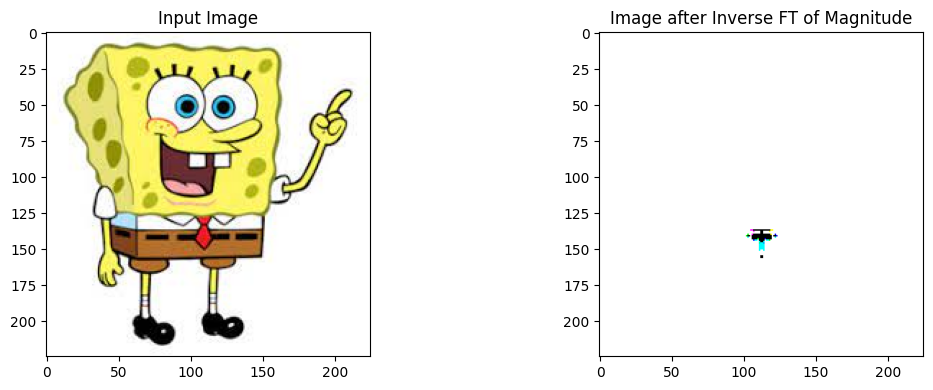

In [34]:
# Code for Problems 7a and 7b

# Render image
m = imageio.v2.imread('/content/HW6.jpg') # Picture may not be part of the file for the submission
M = np.fft.fft2(m) # Take DFT of image

Mnew = np.abs(M) # Create matrix from magnitudes
Mnew=np.fft.ifft2(Mnew).real # Inverse FT

# Plot Characteristics
fig, ax = plt.subplots(1,2,figsize=(12,4), tight_layout=True)
ax[0].imshow(m, cmap = 'gray');ax[0].set_title('Input Image')
ax[1].imshow(Mnew, cmap = 'gray');ax[1].set_title('Image after Inverse FT of Magnitude')
plt.show()

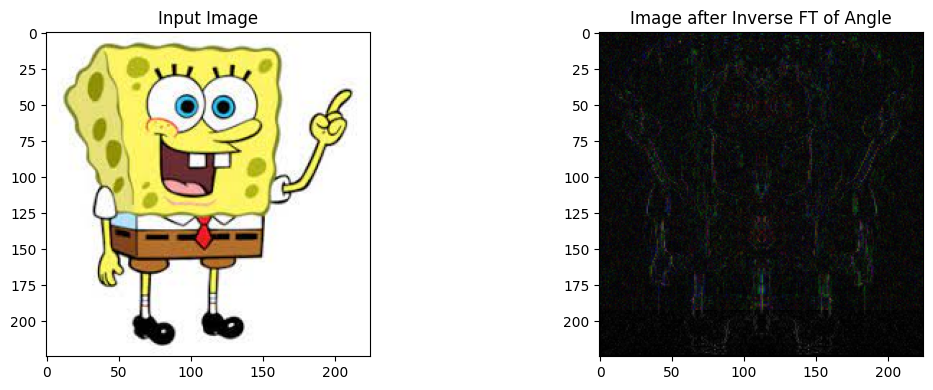

In [37]:
#Problem 7c

M = np.fft.fft2(m)
Mnew=np.angle(M) # Create new matrix out of angles
Mnew = np.fft.ifft2(Mnew) # Inverse FT
Mnew = np.abs(Mnew)

# Plot Characteristics
fig, ax = plt.subplots(1,2,figsize=(12,4), tight_layout=True)
ax[0].imshow(m, cmap = 'gray');ax[0].set_title('Input Image')
ax[1].imshow(Mnew, cmap = 'gray');ax[1].set_title('Image after Inverse FT of Angle')
plt.show()

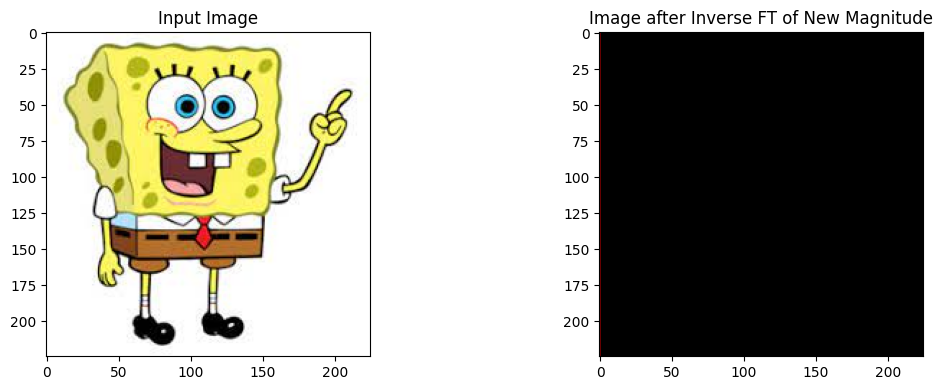

In [29]:
# Problem 7d

Mnew[Mnew>=0]=1 # Set all magnitudes to 1
Mnew = np.fft.ifft2(Mnew) # Inverse FT
Mnew = np.abs(Mnew)

# Plot Characteristics
fig, ax = plt.subplots(1,2,figsize=(12,4), tight_layout=True)
ax[0].imshow(m, cmap = 'gray');ax[0].set_title('Input Image')
ax[1].imshow(Mnew, cmap = 'gray');ax[1].set_title('Image after Inverse FT of New Magnitude')
plt.show()